<a href="https://colab.research.google.com/github/jannat99/ML/blob/Kmeans-Clustering/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# **Import Dataset**

In [ ]:
drive.mount('/content/drive')
dataset = np.loadtxt("/content/drive/MyDrive/dataset/data_k_mean.txt")
dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[-7.87157, -4.86573],
       [-4.76661, -6.87944],
       [-6.67986, -5.8308 ],
       ...,
       [ 6.91832, -0.32132],
       [-8.23828, -4.00405],
       [-5.75112, -5.99531]])

# **Plot Graph**

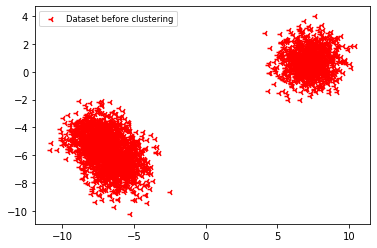

In [ ]:
graph, g = plt.subplots()
graph.set_figheight(4)
graph.set_figwidth(6)
g.scatter(dataset[:,0],dataset[:,1],marker='3',color='r',label='Dataset before clustering')
legend = g.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.4)
legend.get_frame().set_facecolor('None')
plt.show()

# **Implement K-means Clustering**

In [ ]:
K=int(input('Enter K:'))

def dis(a,b):
    return np.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))

def calculate_mean(cluster):
    x_sum=0
    y_sum=0
    for m in cluster:
        x_sum+=dataset[m][0]
        y_sum+=dataset[m][1]    
    n=max(1,len(cluster))
    return (x_sum)/n,(y_sum)/n

def get_new_cluster(means,k):
    new=[]
    for i in range(k):
        x=[]
        new.append(x)
    for tp in range(len(dataset)):
        mn=999999999
        nc=-1
        for i in range(k):
            d=dis(means[i],dataset[tp])
            if(d<mn):
                mn=d
                nc=i  
        new[nc].append(tp)
    return new 
def check(c_old,c_new,k):
    for i in range(k):
        if(len(c_old[i])!=len(c_new[i])):          
            return False
    for i in range(k):
        c_old[i].sort()
        c_new[i].sort()
        for j in range(len(c_old[i])):
            if(c_old[i][j]!=c_new[i][j]):
                return False
    return True                               
def k_means(k):
    ar=[]
    for i in range(k):
        x=[]
        ar.append(x)   
    for i in range(k):
        ar[i].append(i)    
    prev=ar.copy()  
    while(True):
        means=[]
        for c in range(k):
            means.append(calculate_mean(ar[c]))
        curr=get_new_cluster(means,k)
        if(check(ar,curr,k)):
            break
        ar=curr.copy()
    return curr

final_cluster=k_means(K)
for i in range(K):
    print(final_cluster[i])

Enter K:2
[0, 1, 2, 3, 4, 6, 9, 10, 12, 13, 14, 15, 17, 19, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 45, 46, 49, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 92, 94, 96, 97, 99, 100, 103, 104, 105, 106, 108, 109, 110, 111, 112, 114, 116, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 132, 134, 136, 137, 141, 142, 143, 145, 146, 149, 150, 151, 152, 153, 155, 156, 159, 160, 164, 167, 170, 171, 173, 178, 180, 181, 183, 184, 185, 186, 187, 191, 193, 194, 195, 196, 197, 198, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 216, 217, 219, 220, 222, 224, 226, 230, 231, 232, 233, 235, 236, 237, 238, 240, 241, 242, 243, 244, 246, 250, 251, 252, 254, 256, 260, 261, 264, 265, 273, 274, 279, 280, 281, 283, 284, 285, 286, 287, 288, 294, 295, 297, 298, 299, 301, 303, 304, 306, 307, 308, 309, 310, 311, 312, 314, 315, 318, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 33

# **Graph Plot**

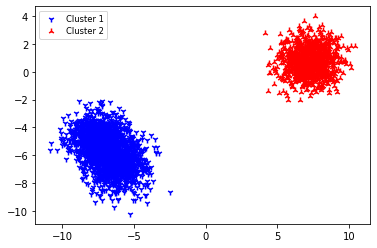

In [ ]:
x_point=[]
y_point=[]
for i in range(K):
    x=[]
    y=[]
    x_point.append(x)
    y_point.append(y)
for i in range(K):
    for x in final_cluster[i]:
        x_point[i].append(dataset[x][0])
        y_point[i].append(dataset[x][1])
graph, g = plt.subplots()
graph.set_figheight(4)
graph.set_figwidth(6)
colors=['blue','red','green']
marker=['1','2','3']
for i in range(K):
    name="Cluster "+str(i+1)
    g.scatter(x_point[i],y_point[i],marker=marker[i],color=colors[i],label=name)
legend = g.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.4)
legend.get_frame().set_facecolor('None')
plt.show()